<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/tfm_v0_0_221022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
test_img_path = '/content/drive/MyDrive/IA3/TFM/archive/images/BikesHelmets0.png'

In [3]:
test_dat_path = '/content/drive/MyDrive/IA3/TFM/archive/annotations/BikesHelmets0.xml'

In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt; 
import matplotlib.patches as patches
from tensorflow.keras.utils import load_img

In [5]:
import xml.etree.ElementTree as ET

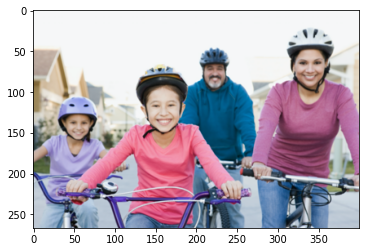

In [6]:
image = load_img(test_img_path)
plt.imshow(image) 

In [7]:
xml_file = open(test_dat_path)
print(xml_file.read())


<annotation>
    <folder>images</folder>
    <filename>BikesHelmets0.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>29</xmin>
            <ymin>105</ymin>
            <xmax>82</xmax>
            <ymax>160</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>122</xmin>
            <ymin>66</ymin>
            <xmax>193</xmax>
            <ymax>154</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</tr

In [8]:
tree=ET.parse(test_dat_path)
root=tree.getroot()
print(ET.tostring(root))

b'<annotation>\n    <folder>images</folder>\n    <filename>BikesHelmets0.png</filename>\n    <size>\n        <width>400</width>\n        <height>267</height>\n        <depth>3</depth>\n    </size>\n    <segmented>0</segmented>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>29</xmin>\n            <ymin>105</ymin>\n            <xmax>82</xmax>\n            <ymax>160</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>122</xmin>\n            <ymin>66</ymin>\n            <xmax>193</xmax>\n            <ymax>154</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspe

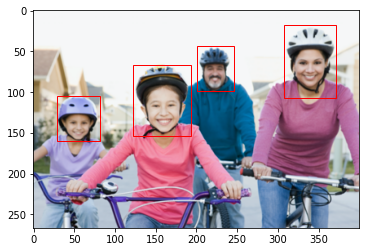

In [9]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Create a Rectangle patch
    rect = patches.Rectangle((int(xmin), int(ymin)), int(w), int(h), linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
import matplotlib.image as img
from numpy.core.fromnumeric import argmax

In [11]:
# Keras
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import imagenet_utils
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory



b'<annotation>\n    <folder>images</folder>\n    <filename>BikesHelmets0.png</filename>\n    <size>\n        <width>400</width>\n        <height>267</height>\n        <depth>3</depth>\n    </size>\n    <segmented>0</segmented>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>29</xmin>\n            <ymin>105</ymin>\n            <xmax>82</xmax>\n            <ymax>160</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>122</xmin>\n            <ymin>66</ymin>\n            <xmax>193</xmax>\n            <ymax>154</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspe

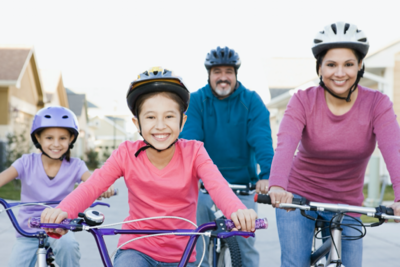

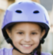

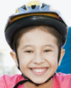

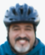

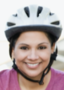

In [14]:
import cv2
from google.colab.patches import cv2_imshow
tree=ET.parse(test_dat_path)
root=tree.getroot()
print(ET.tostring(root))

# Create figure and axes
img = cv2.imread(test_img_path)
cv2_imshow(img)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Cropping an image
    cropped_image = img[ymin:ymax, xmin:xmax, ]
    
    # Display cropped image
    cv2_imshow(cropped_image)

    plt.show()

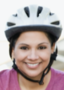

In [15]:
cv2_imshow(cropped_image)

In [55]:

img_path      = '/content/drive/MyDrive/IA3/TFM/archive/images/'
xml_path      = '/content/drive/MyDrive/IA3/TFM/archive/annotations/'
img_crop_path = '/content/drive/MyDrive/IA3/TFM/archive/imagesCrop/'
cont=[0,0]

contenido = os.listdir(img_path)

for fichero in contenido:
    if fichero.endswith('.png'):
     
      img = cv2.imread(img_path+fichero)
      tree=ET.parse(xml_path+fichero[:-3]+'xml')

      for element in tree.findall('object'):

        clase = int(np.invert('Without' in element.find("name").text))
        xmin = int(element.find("bndbox").find('xmin').text)
        ymin = int(element.find("bndbox").find('ymin').text)
        xmax = int(element.find("bndbox").find('xmax').text)
        ymax = int(element.find("bndbox").find('ymax').text)

        h = ymax - ymin
        w = xmax - xmin

        # Cropping an image
        cropped_image = img[ymin:ymax, xmin:xmax]
        cv2.imwrite(img_crop_path + clase + '_' + cont[clase] + '.png', cropped_image)
        
        cont[clase] = cont[clase] + 1



FileNotFoundError: ignored

In [ ]:
def create_features(path):
 
    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return 0